In [5]:
import cv2

video_path = "/content/drive/MyDrive/videos/clip.mp4"
output_path = "/content/drive/MyDrive/frames/"
from google.colab import drive
drive.mount('/content/drive')

!mkdir '/content/drive/My Drive/frames'
!mkdir '/content/drive/My Drive/Attendance'

vidcap = cv2.VideoCapture(video_path)
success, image = vidcap.read()
count = 0

while success:
    if count % 5 == 0:
        cv2.imwrite(output_path + "frame%d.jpg" % count, image)  # save frame as JPEG file
        print("Frame ",count);
    success, image = vidcap.read()
    count += 1

print(count)
  


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frame  0
Frame  5
Frame  10
Frame  15
Frame  20
Frame  25
Frame  30
Frame  35
Frame  40
Frame  45
Frame  50
Frame  55
Frame  60
Frame  65
Frame  70
Frame  75
Frame  80
Frame  85
Frame  90
Frame  95
Frame  100
Frame  105
Frame  110
Frame  115
Frame  120
Frame  125
Frame  130
Frame  135
Frame  140
Frame  145
Frame  150
Frame  155
Frame  160
Frame  165
Frame  170
Frame  175
Frame  180
Frame  185
Frame  190
Frame  195
Frame  200
Frame  205
Frame  210
Frame  215
Frame  220
Frame  225
Frame  230
Frame  235
Frame  240
Frame  245
Frame  250
Frame  255
Frame  260
Frame  265
Frame  270
Frame  275
Frame  280
Frame  285
Frame  290
Frame  295
Frame  300
Frame  305
Frame  310
Frame  315
Frame  320
Frame  325
Frame  330
Frame  335
Frame  340
Frame  345
Frame  350
Frame  355
Frame  360
Frame  365
Frame  370
Frame  375
Frame  380
Frame  385
Frame  390
Frame  395
Frame  400
Fr

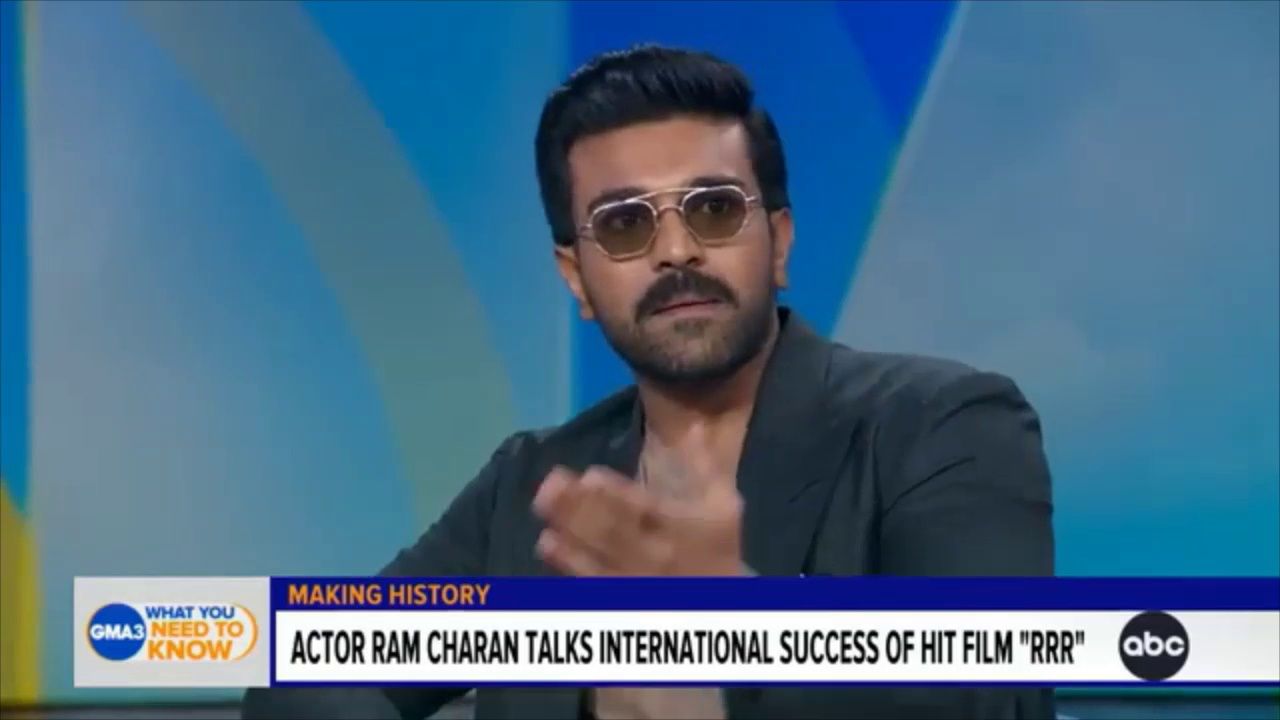

In [10]:

from PIL import Image

# Open the image file
img = Image.open(output_path + "frame55.jpg")

# Show the image
img.show()

In [13]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=0c3f66d58cef0fe15608f4c22538bb1fdfea038ee9b630f5af33cc16e283e134
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [23]:
import face_recognition
import os
known_faces = []
known_names = []
face_encodings = []
def load_known_faces():
    # load known faces and names

    folder_path = "/content/drive/MyDrive/Ramcharan/"
    # files = []

    for file in os.listdir(folder_path):
        if os.path.isfile(folder_path+file):
          known_faces.append(face_recognition.face_encodings(face_recognition.load_image_file(folder_path+file))[0])
          known_names.append("RamCharan")
          # face_encoding.
          # known_faces.append(face_recognition.load_image_file("known_faces/face2.jpg"))
          # known_names.append("Jane Doe")
    # add more known faces and names as needed

load_known_faces()


In [28]:
import os
import pandas as pd
import numpy as np

def process_frames():
    attendance = {}
    for name in known_names:
        attendance[name] = []

    frames_path = "/content/drive/MyDrive/frames/"
    frames = os.listdir(frames_path)
    for frame in frames[:30]:
        frame_path = frames_path + frame
        print(frame_path)
        image = cv2.imread(frame_path)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # detect faces in the frame
        face_locations = face_recognition.face_locations(rgb_image)
        face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

        # compare faces with known faces
        for face_encoding in face_encodings:
            match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.6)
            if True in match:
                name = known_names[np.argmax(match)]
                attendance[name].append(1)
            else:
                for name in known_names:
                    attendance[name].append(0)

    # calculate attendance percentage
    attendance_percentage = {}
    for name in known_names:
        attendance_count = sum(attendance[name])
        # total_frames = len(frames)
        total_frames = 30

        percentage = attendance_count / total_frames * 100
        attendance_percentage[name] = percentage

    # store attendance in excel file
    df = pd.DataFrame.from_dict(attendance_percentage, orient='index', columns=['Attendance Percentage'])
    df.to_excel('/content/drive/MyDrive/Attendance/attendance.xlsx')

    # send individual attendance to respective mails
    # code for sending mails not included in this answer

    # send all attendance to administrative section
    # code for sending attendance to administrative section using machine learning algorithms not included in this answer
process_frames()
print("Done")


/content/drive/MyDrive/frames/frame0.jpg
/content/drive/MyDrive/frames/frame5.jpg
/content/drive/MyDrive/frames/frame10.jpg
/content/drive/MyDrive/frames/frame15.jpg
/content/drive/MyDrive/frames/frame20.jpg
/content/drive/MyDrive/frames/frame25.jpg
/content/drive/MyDrive/frames/frame30.jpg
/content/drive/MyDrive/frames/frame35.jpg
/content/drive/MyDrive/frames/frame40.jpg
/content/drive/MyDrive/frames/frame45.jpg
/content/drive/MyDrive/frames/frame50.jpg
/content/drive/MyDrive/frames/frame55.jpg
/content/drive/MyDrive/frames/frame60.jpg
/content/drive/MyDrive/frames/frame65.jpg
/content/drive/MyDrive/frames/frame70.jpg
/content/drive/MyDrive/frames/frame75.jpg
/content/drive/MyDrive/frames/frame80.jpg
/content/drive/MyDrive/frames/frame85.jpg
/content/drive/MyDrive/frames/frame90.jpg
/content/drive/MyDrive/frames/frame95.jpg
/content/drive/MyDrive/frames/frame100.jpg
/content/drive/MyDrive/frames/frame105.jpg
/content/drive/MyDrive/frames/frame110.jpg
/content/drive/MyDrive/frames/fra